In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [154]:
df = pd.read_csv('persons_csv.csv')

df.head()

,chest_c,waist_c,gender,size,size_value,height,weight
0,107.4,93.3,Male,XL,4,180.34,81.65
1,102.1,87.0,Male,XL,4,172.72,72.57
2,112.0,96.4,Male,XL,4,172.72,92.99
3,111.4,85.7,Male,L,3,167.64,79.38
4,104.8,86.8,Male,L,3,195.58,96.62


In [155]:
df.loc[df['gender'] == 'Male', 'gender'] = 1
df.loc[df['gender'] == 'Female', 'gender'] = 0

In [156]:
df

,chest_c,waist_c,gender,size,size_value,height,weight
0,107.4,93.3,1,XL,4,180.34,81.65
1,102.1,87.0,1,XL,4,172.72,72.57
2,112.0,96.4,1,XL,4,172.72,92.99
3,111.4,85.7,1,L,3,167.64,79.38
4,104.8,86.8,1,L,3,195.58,96.62
...,...,...,...,...,...,...,...
6063,108.2,104.3,0,XXL,5,170.18,81.65
6064,101.6,97.1,0,XXL,5,160.02,68.04
6065,109.3,98.2,0,XXL,5,167.64,76.20
6066,92.2,83.7,0,XL,4,160.02,60.33


In [157]:
X = df.drop(['size_value', 'size'], axis=1).copy()
X.head()

,chest_c,waist_c,gender,height,weight
0,107.4,93.3,1,180.34,81.65
1,102.1,87.0,1,172.72,72.57
2,112.0,96.4,1,172.72,92.99
3,111.4,85.7,1,167.64,79.38
4,104.8,86.8,1,195.58,96.62


In [158]:
y = df.size_value.copy()
y.head()

0    4
1    4
2    4
3    3
4    3
Name: size_value, dtype: int64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.705, 0.9375, 'waist_c <= 91.85\ngini = 0.695\nsamples = 402\nvalue = [2, 6, 36, 68, 120, 170]\nclass = XXL'),
 Text(0.49, 0.8125, 'waist_c <= 81.85\ngini = 0.674\nsamples = 215\nvalue = [2, 6, 36, 68, 95, 8]\nclass = XL'),
 Text(0.3, 0.6875, 'gender <= 0.5\ngini = 0.591\nsamples = 90\nvalue = [2, 6, 31, 48, 3, 0]\nclass = L'),
 Text(0.16, 0.5625, 'chest_c <= 84.85\ngini = 0.428\nsamples = 67\nvalue = [0, 0, 16, 48, 3, 0]\nclass = L'),
 Text(0.08, 0.4375, 'waist_c <= 74.85\ngini = 0.375\nsamples = 20\nvalue = [0, 0, 15, 5, 0, 0]\nclass = M'),
 Text(0.04, 0.3125, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0, 0]\nclass = M'),
 Text(0.12, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]\nclass = L'),
 Text(0.24, 0.4375, 'chest_c <= 97.8\ngini = 0.158\nsamples = 47\nvalue = [0, 0, 1, 43, 3, 0]\nclass = L'),
 Text(0.2, 0.3125, 'weight <= 51.26\ngini = 0.044\nsamples = 44\nvalue = [0, 0, 1, 43, 0, 0]\nclass = L'),
 Text(0.16, 0.1875, 'height <= 161.29\ngini = 0.5\nsa

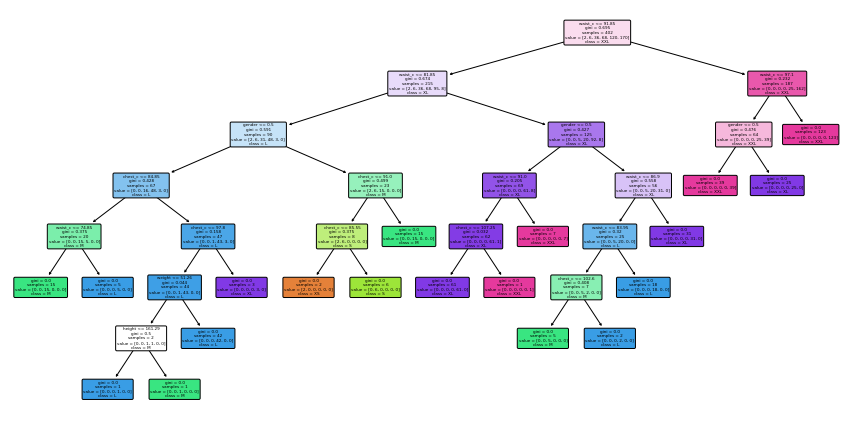

In [76]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['XS', 'S', 'M', 'L', 'XL', 'XXL'],
          feature_names=X.columns
          )

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


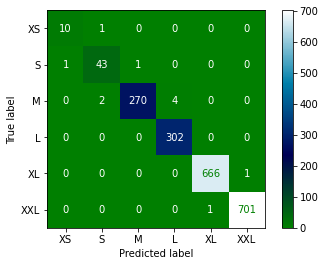

In [124]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'], cmap='ocean')

In [160]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [161]:
ccp_alphas

array([0.00000000e+00, 2.45261489e-04, 4.51004510e-04, 8.32623711e-04,
       1.36326363e-03, 2.85139215e-03, 3.52077651e-03, 3.52774932e-03,
       3.83188495e-03, 1.53111618e-02, 2.02979608e-02, 2.31648908e-02,
       2.45873888e-02, 4.22054394e-02, 5.06193522e-02, 1.29251448e-01,
       2.49965871e-01])

In [162]:
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00024526, 0.000451  , 0.00083262, 0.00136326,
       0.00285139, 0.00352078, 0.00352775, 0.00383188, 0.01531116,
       0.02029796, 0.02316489, 0.02458739, 0.04220544, 0.05061935,
       0.12925145])

In [163]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [164]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

In [165]:
train_scores

[1.0,
 0.9997539975399754,
 0.9995079950799508,
 0.9990159901599016,
 0.9980319803198032,
 0.9965559655596556,
 0.9948339483394834,
 0.9906519065190652,
 0.9886838868388684,
 0.976629766297663,
 0.9653136531365314,
 0.9520295202952029,
 0.9360393603936039,
 0.8851168511685117,
 0.7318573185731857,
 0.6376383763837639]

In [131]:
test_scores

[0.9945082376435347,
 0.9945082376435347,
 0.9950074887668497,
 0.9950074887668497,
 0.9920119820269596,
 0.9915127309036446,
 0.9915127309036446,
 0.9855217174238642,
 0.9845232151772342,
 0.9710434348477284,
 0.963055416874688,
 0.9600599101347979,
 0.9430853719420869,
 0.8886669995007489,
 0.7109335996005991,
 0.6275586620069895]

[]

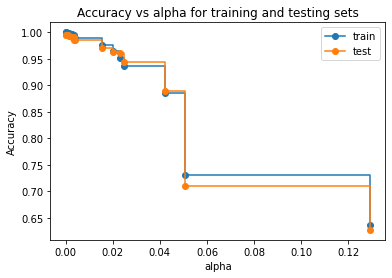

In [166]:
_, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.plot()

In [167]:
alpha_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [134]:
alpha_scores

[[0.0, 0.9985239852398525, 0.0014344285104170287],
 [0.00024526148875946387, 0.9985239852398525, 0.0014344285104170287],
 [0.00045100451004510047, 0.9982779827798278, 0.0012543713440572486],
 [0.0008326237108524931, 0.9972939729397294, 0.002385082340672261],
 [0.0013632636326363263, 0.9960639606396062, 0.00284768435492996],
 [0.002851392150285137, 0.9945879458794588, 0.00470630417459018],
 [0.0035207765121129473, 0.9889298892988929, 0.0044688566112140345],
 [0.0035277493243159853, 0.9889298892988929, 0.0044688566112140345],
 [0.003831884952442726, 0.9872078720787207, 0.003615483015178117],
 [0.015311161807270249, 0.9825338253382533, 0.007477827381830586],
 [0.020297960827141904, 0.9682656826568266, 0.011390737419719799],
 [0.023164890752548982, 0.9567035670356704, 0.004628508664754459],
 [0.024587388786011577, 0.9441574415744156, 0.005904059040590391],
 [0.04220543937211136, 0.9121771217712178, 0.03496871104420008],
 [0.05061935224877889, 0.7896678966789668, 0.06542000546556324],
 [0.1

<AxesSubplot:xlabel='alpha'>

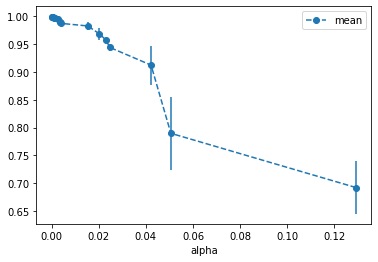

In [135]:
alpha_results = pd.DataFrame(alpha_scores, columns=['alpha', 'mean', 'std'])
alpha_results.plot(x='alpha', y='mean', yerr='std', marker='o', linestyle='--')

In [136]:
alpha_results[(alpha_results['alpha'] > 0.008) & (alpha_results['alpha'] < 0.018)]

,alpha,mean,std
9,0.015311,0.982534,0.007478


In [168]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015311)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

[Text(0.7, 0.9285714285714286, 'waist_c <= 97.05\ngini = 0.719\nsamples = 4065\nvalue = [12, 84, 512, 652, 1329, 1476]\nclass = XXL'),
 Text(0.6333333333333333, 0.7857142857142857, 'waist_c <= 86.95\ngini = 0.681\nsamples = 2802\nvalue = [12, 84, 512, 652, 1329, 213]\nclass = XL'),
 Text(0.4, 0.6428571428571429, 'gender <= 0.5\ngini = 0.672\nsamples = 1529\nvalue = [12, 84, 512, 652, 269, 0]\nclass = L'),
 Text(0.26666666666666666, 0.5, 'waist_c <= 81.95\ngini = 0.611\nsamples = 765\nvalue = [1, 11, 104, 380, 269, 0]\nclass = L'),
 Text(0.2, 0.35714285714285715, 'waist_c <= 74.85\ngini = 0.388\nsamples = 504\nvalue = [1, 11, 104, 380, 8, 0]\nclass = L'),
 Text(0.13333333333333333, 0.21428571428571427, 'chest_c <= 85.9\ngini = 0.512\nsamples = 164\nvalue = [1, 11, 103, 49, 0, 0]\nclass = M'),
 Text(0.06666666666666667, 0.07142857142857142, 'gini = 0.189\nsamples = 115\nvalue = [1, 11, 103, 0, 0, 0]\nclass = M'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 49\nvalue = [0, 0, 0

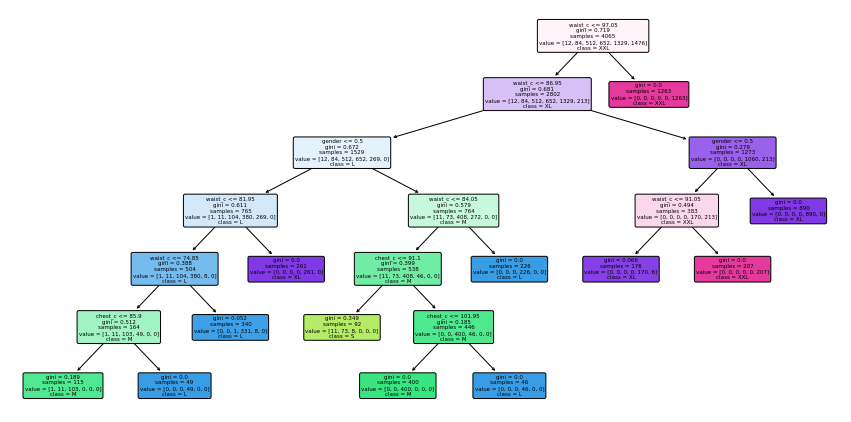

In [169]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=['XS', 'S', 'M', 'L', 'XL', 'XXL'],
          feature_names=X.columns
          )

In [170]:

person = [[95, 81, 0, 171, 59]]
clf_dt_pruned.predict(person)

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3])

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


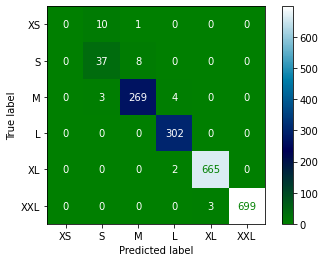

In [171]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'], cmap='ocean')